In [ ]:
import re
import pandas as pd

def converter(txt):
    txt = re.sub('Question \d*', '질문', txt)
    txt = re.sub('Answer \d*', '답변', txt)

    txt = re.sub('질문 \d*', '질문', txt)
    txt = re.sub('답변 \d*', '답변', txt)
    txt = re.sub('대답 \d*', '답변', txt)

    txt = re.sub('Q\d*', '질문', txt)
    txt = re.sub('A\d*', '답변', txt)

    txt_list = txt.split('\n\n')
    full_df = pd.DataFrame(columns = ['instruction', 'output'])
    for session in txt_list:
        idx = session.find('질문:')
        session = session[idx:]
        output = session.split('\n')[-1][4:]

        total_len = len(session)
        instruction = session[:total_len - len(output)-5]

        instruction = instruction.strip()
        output = output.strip()

        df = pd.DataFrame({
            'instruction' : [instruction],
            'output' : [output]
        })
        full_df = pd.concat([full_df, df])
    
    full_df.reset_index(drop=True, inplace=True)
    
    return full_df

test = pd.read_csv('./gpt3_jieun.csv')

final = pd.DataFrame(columns = ['instruction', 'output'])
for i in range(len(test)):
    splited_dialogues = converter(test.loc[i, "generated"])
    final = pd.concat([final, splited_dialogues])
final.reset_index(drop=True, inplace=True)

final['question_len'] = final['instruction'].apply(lambda x: x.count('질문:'))
final['answer_len'] = final['instruction'].apply(lambda x: x.count('답변:'))

In [104]:
print('NA 행 확인')
print(final[final['instruction'].isnull()])
print('------------------------------------------------------------------------------------------------------------------------------')
print('질문과 답변 갯수 --> instruction이 제대로 생성되어서 정리되었는지 확인하는 용도, 비었으면 제대로 된 것!')
final[(final['question_len'] != 3) | (final['answer_len'] != 2)]

NA 행 확인
Empty DataFrame
Columns: [instruction, output, question_len, answer_len]
Index: []
------------------------------------------------------------------------------------------------------------------------------
질문과 답변 갯수 --> instruction이 제대로 생성되어서 정리되었는지 확인하는 용도, 비었으면 제대로 된 것!


,instruction,output,question_len,answer_len


count    2801.000000
mean      322.146376
std        55.285099
min       155.000000
25%       284.000000
50%       318.000000
75%       355.000000
max       583.000000
Name: len, dtype: float64


,instruction,output,question_len,answer_len,len
1242,질문: 오늘 일이 너무 많아서 너무 힘들어요.\n답변: 정말 힘들겠네요. 근데 그렇...,"네, 일을 효율적으로 처리하는 방법이 있어요. 어떤 방식으로 일을 하고 계신가요?",3,2,155
1243,질문: 제 친구가 항상 저를 배신하거든요. 어떻게 대처해야 할까요?\n답변: 그게 ...,그 사람과 솔직하게 대화하고 상황을 공유해보세요. 그리고 서로에 대한 이해를 높이는...,3,2,188
1244,질문: 시험 준비를 하다가 너무 힘들어서 desparate 했어요.\n답변: 그럴 ...,"네, 공부하면서 잠깐 쉬는 시간을 여러 번 갖는 것도 좋아요. 그리고 카페에 가서 ...",3,2,199
1245,질문: 최근에 학업 때문에 스트레스 받아요. 어떻게 해야할까요?\n답변: 학업 스트...,"예를 들어, 운동을 하거나 산책을 하는 것도 좋아요. 그리고 친구들과 함께 시간을 ...",3,2,181
1246,질문: 최근에 집중력이 많이 떨어져요. 어떻게 하면 좋을까요?\n답변: 집중력이 떨...,좋은 수면과 휴식을 취하는 것도 중요해요. 그리고 작은 목표를 세우고 달성해보는 것...,3,2,177
1247,질문: 최근에 자기관리를 소홀히 하는 것 같아요. 어떻게 해야할까요?\n답변: 자기...,"예를 들어, 시간을 제대로 관리하고 일정을 잘 짜는 것도 중요해요. 그리고 습관을 ...",3,2,188
1248,질문: 제 연봉 인상을 요구했는데 거절당했어요. 어떻게 해야할까요?\n답변: 연봉 ...,"예를 들어, 성과를 체계적으로 정리해서 회사에 제출하는 것도 좋아요. 그리고 이유를...",3,2,186
1249,질문: 최근에 새로운 취미를 찾고 싶은데 어떤 것이 좋을까요?\n답변: 새로운 취미...,"예를 들어, 관련된 도서나 온라인 강의를 찾아보는 것도 좋아요. 그리고 주변 사람들...",3,2,184
1250,질문: 최근에 친구와의 관계가 약해진 것 같아요. 어떻게 해야할까요?\n답변: 친구...,친구에게 먼저 연락을 주고 솔직한 마음을 전해보세요. 그리고 함께 시간을 보내는 것...,3,2,194
1387,질문: 집에서 혼자 있으면 불안해요.\n답변: 그럴 때가 있죠. 혼자 있을 때 불안...,그것도 어려운 상황이겠죠. 실패하는 생각 때문에 불안해지는 건 당연한 것 같아요. ...,3,2,185


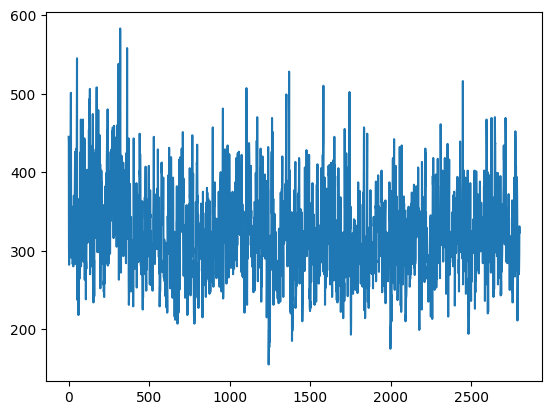

In [105]:
final['len'] = final['instruction'].apply(lambda x: len(x))
print(final['len'].describe())
final['len'].plot()
final[final['len'] < 200]

In [106]:
final[['instruction', 'output']].to_csv('./gpt3.5_jieun_edit.csv', index=False)

### gpt3.5 turbo api concat

In [5]:
import pandas as pd
import re 

jieun_df = pd.read_csv('./gpt3.5_jieun_edit.csv') 
concat_df = pd.read_csv('./concat.csv')  
geoung_df = pd.read_csv('./multi-turn_conversation_gpt_3.5_v1.csv') 
gpt3_api_final = pd.concat([concat_df, jieun_df, geoung_df]) 
gpt3_api_final['source'] = 'gpt_3.5_turbo'
gpt3_api_final

,instruction,output,source
0,질문: 오늘 일이 너무 힘들고 지친 느낌이에요.\n답변: 정말 힘들겠네요. 일상에서...,휴식을 취하는 것은 정말 중요한 일이에요. 방해받지 않고 휴식을 취하기 위해서는 어...,gpt_3.5_turbo
1,"질문: 요즘 일이 잘 안 풀려서 힘들어요.\n답변: 이해해요, 힘들고 어려운 시기일...",물론 있어요! 업무를 효율적으로 처리하기 위해서는 시간을 관리하고 우선순위를 정하는...,gpt_3.5_turbo
2,질문: 저는 자존감이 낮아서 자괴감에 시달려요. 어떻게 하면 자신감을 키울 수 있을...,"그럴 수 있어요. 자존감은 시간이 걸리는 과정이에요. 더불어, 자신의 감정과 생각을...",gpt_3.5_turbo
3,"질문: 저는 친구와 큰 싸움을 했는데, 너무 화가 나서 진정이 안 돼요.\n답변: ...","네, 완전히 이해해요! 한 달에 네 번은 너무 많아요. 그런 때때로 용서할만한 실수...",gpt_3.5_turbo
4,"질문: 나는 시험에 대해 걱정이 많아요. 어떻게 해야 할까요?\n답변: 그렇군요, ...",공부 계획을 세우고 그에 따라 진행하는 것은 좋은 습관입니다. 그렇지만 때로는 계획...,gpt_3.5_turbo
...,...,...,...
2249,질문: 요즘 영화 보는 것이 취미가 되었어\n답변: 영화를 즐기는 것은 좋은 취미에...,마블 시리즈의 영화들은 흥미진진한 이야기와 멋진 액션으로 가득 차 있어요. 특히 '...,gpt_3.5_turbo
2250,질문: 요즘 운동을 시작했는데 꾸준히 하기가 어려워\n답변: 운동을 시작하는 것은 ...,하타 요가는 몸의 균형과 유연성을 키울 수 있는 요가 스타일이에요. 하타 요가를 통...,gpt_3.5_turbo
2251,질문: 요즘 요리를 배우고 싶어\n답변: 요리를 배우는 것은 창의성을 표현하고 새로...,마카롱은 아름다운 색상과 맛으로 유명한 디저트에요. 마카롱을 만들어보면 예술적인 멋...,gpt_3.5_turbo
2252,질문: 최근에 일이 잘 안 풀려서 스트레스 받아\n답변: 일이 잘 안 풀릴 때는 힘...,동료들의 의견을 듣는 것은 좋은 시도에요. 함께 의논하고 협력하면 프로젝트가 더욱 ...,gpt_3.5_turbo


### gpt4 수작업

In [42]:
gpt4_new = pd.read_csv('./GPT4_new.csv')
gpt4_new['source'] = 'gpt_4'
gpt4_new

,instruction,output,source
0,질문: 최근에 헬스에 꽂혀서 꾸준히 운동하고 있어. 근데 계속 같은 운동만 하니까 ...,"프리스타일, 기본적인 기술부터 시작하는 좋은 선택이죠. 이외에도 수영을 배우는데 도...",gpt_4
1,"질문: 나는 항상 할 일이 많아서 시간이 부족해.\n답변: 그렇군요, 할 일이 너무...","답변: 아하, 계획을 세우는 것이 어렵다면 시간 관리도 어려울 수 있겠네요. 그럼 ...",gpt_4
2,"질문: 어제 저녁부터 무슨 일도 손에 안 잡혀.\n답변: 그랬군요, 어제 저녁부터 ...",이해가 가요. 음악에 대한 열정을 가지고 있어서 새로운 것에 도전하려 했는데 원하는...,gpt_4
3,질문: 요즘 책읽기에 빠져있어. 그런데 한 권을 끝내기까지 오래 걸려서 아쉬워.\n...,홍길동 전은 우리나라 사람들이 가장 친숙하게 알고 있는 이야기 중 하나죠. 그런 이...,gpt_4
4,질문: 공부가 잘 안돼서 고민이에요.\n답변: 공부에 어려움을 겪을 때마다 정말 힘...,한 가지 방법에만 의존하는 것은 어려울 수 있어요. 다양한 학습 방법을 접목시키는 ...,gpt_4
...,...,...,...
1782,"질문: 나는 커피를 좋아하는데, 다른 사람에게 커피의 매력을 어떻게 설명해야 할지 ...","답변: 오, 향과 맛이 좋다니, 이해해요. 그럼 그 느낌을 어떻게 표현하면 좋을까요?",gpt_4
1783,"질문: 나는 미래가 두렵다.\n답변: 그럴 수 있어요, 미래는 알 수 없고 불확실한...","답변: 그렇군요, 그런 두려움은 충분히 이해가 가요. 그럼 어떻게 하면 그런 두렵움...",gpt_4
1784,"질문: 이번에 계좌를 하나 더 개설하려고 하는데, 어떤 은행이 좋을까?\n답변: 음...",답변: 그렇다면 온라인 앱이 사용하기 편하고 다양한 서비스를 제공하는 은행을 찾아보...,gpt_4
1785,"질문: 최근에 플랫폼 승마를 배우기 시작했어. 정말 재밌더라.\n답변: 아, 그거 ...",낚시는 조용한 활동이라 사람마다 호불호가 갈릴 수 있죠. 승마와 같은 활발한 활동을...,gpt_4


### 이전 취합 데이터

In [8]:
def txt_process(txt):
    txt = re.sub(r'(질문)\s*(:)', r'\1\2', txt)
    txt = re.sub(r'(답변)\s*(:)', r'\1\2', txt)

    return txt

In [9]:
full_df = pd.read_csv('./full_df.csv')
full_df['instruction'] = full_df['instruction'].apply(txt_process)
full_df['source'] = 'gpt_4'
full_df

,instruction,output,type,source
0,전시회를 자주 가는 편이에요.,예술의 세계를 즐기는 멋진 방법이죠! 전시회는 우리에게 새로운 시각을 제공해주곤 하...,single,gpt_4
1,내일 친구들과 여행을 가는데 무슨 옷을 입어야 할지 모르겠어요.,여행을 앞두고 있다니 정말 설레겠어요! 😊 여행지의 날씨와 일정을 고려해서 옷을 선...,single,gpt_4
2,"다이어트를 시작했는데, 요즘 계속해서 음식에 대한 욕구가 생겨요.","그런 감정, 정말 공감합니다. 다이어트 중에 음식에 대한 욕구가 생기는 것은 자연스...",single,gpt_4
3,퇴근 후 집에 가는 길에 아름다운 석양을 봤어요!,정말 아름다운 순간이었을 것 같네요! 그런 소소한 행복이 하루의 피로를 싹 가셔주곤...,single,gpt_4
4,직장에서 힘들게 느껴져서 그만두고 싶어요. 어떻게 해야할까요?,"직장에서의 힘든 시기, 참 힘드시겠어요. 상황을 잘 이해하고 있다는 걸 알려드리고 ...",single,gpt_4
...,...,...,...,...
11967,질문: 요즘 책 읽는 시간이 별로 없어서 아쉬워. 어떻게 하면 독서 시간을 늘릴 수...,"독서는 상상력을 키우고, 이해력을 향상시키며, 새로운 지식을 얻는 데에 매우 유용해...",multi-3,gpt_4
11968,나는 이 세상에 왜 존재하는 걸까요?,삶의 의미를 찾는 것은 많은 사람들이 고민하는 중요한 문제입니다. 존재의 의미를 찾...,single,gpt_4
11969,첫 키스를 어떻게 할지 너무 걱정되요.,첫 키스는 정말로 떨리는 경험이죠. 하지만 그건 모두가 공통적으로 겪는 경험이에요....,single,gpt_4
11970,우울증이 있는 친구를 어떻게 도와줄 수 있을까요?,그런 상황이라면 걱정이 많으시겠어요. 우울증이 있는 친구를 돕는 것은 그 자체로도 ...,single,gpt_4


## 최종 합본

In [62]:
from tqdm import tqdm
import re
import pandas as pd
pd.set_option('display.max_colwidth', 1000)

# 모아논 데이터 모두 합치기(gpt3.5 api, gpt4 수작업, 이전에 모아둔 버전)
final = pd.concat([gpt3_api_final, gpt4_new, full_df]).reset_index(drop=True)

final['question_len'] = final['instruction'].apply(lambda x: x.count('질문:'))
final['answer_len'] = final['instruction'].apply(lambda x: x.count('답변:'))

for i in range(len(final)):
    # instruction 안에 질문-대답 2, 3쌍이 모두 들어가있는 경우 마지막 답변을 output으로 옮겨줌
    if (final.loc[i, "question_len"] == 3) and (final.loc[i, "answer_len"] == 3) or \
    (final.loc[i, "question_len"] == 2) and (final.loc[i, "answer_len"] == 2):
        lst = final.loc[i, "instruction"].split('\n')
        
        final.loc[i, "instruction"] = '\n'.join(lst[:-1])
        final.loc[i, "output"] = lst[-1].split('답변: ')[1]
    
    # 싱글 턴인데 instruction에 질문 : 이 붙어있는 경우 처리
    elif final.loc[i, 'question_len'] == 1:
        final.loc[i, 'instruction'] = final.loc[i, 'instruction'].split('질문: ')[1]

final['question_len'] = final['instruction'].apply(lambda x: x.count('질문:'))
final['answer_len'] = final['instruction'].apply(lambda x: x.count('답변:'))

final.groupby(['question_len', 'answer_len']).count()

for i in tqdm(range(len(final))):
    if final.loc[i, 'question_len'] == 0:
        final.loc[i, 'type'] = 'single'
    elif final.loc[i, 'question_len'] == 2:
        final.loc[i, 'type'] = 'multi_2'
    elif final.loc[i, 'question_len'] == 3:
        final.loc[i, 'type'] = 'multi_3'

# final[final.isnull().any(axis=1)]
final = final.dropna()
final.sample(frac=1, random_state=42).reset_index(drop=True)
final.drop(['question_len', 'answer_len'], axis=1, inplace=True)

def has_special_char(input_string):
    input_string = input_string[-1]
    if re.search(r'[^\w\s]', input_string):
        return True
    else:
        return False

final['is_ok'] = final['instruction'].apply(has_special_char)

idx = final[(~final['is_ok']) & (final['source'] == 'gpt_3.5_turbo')].index
final.drop(idx, inplace=True)
final = final.sample(frac=1, random_state=43).reset_index(drop=True)
final = final.drop(['is_ok'], axis=1)

final['instruction'] = final['instruction'].apply(lambda x: x.replace("\\n", "\n"))
final

NA 행 확인
Empty DataFrame
Columns: [instruction, output, source, type, question_len, answer_len]
Index: []


100%|██████████| 27092/27092 [00:06<00:00, 3922.72it/s]


In [44]:
final['instruction'] = final['instruction'].apply(str)
final['output'] = final['output'].apply(str)
final['source'] = final['source'].apply(str)
final['type'] = final['type'].apply(str)

In [163]:
final[final.isnull().any(axis=1)]

,instruction,output,source,type


In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity
# import numpy as np
# import pandas as pd
# from tqdm import tqdm
# pd.set_option('display.max_colwidth', 1000)
# # Set the threshold
# threshold = 0.9

# # Create a TF-IDF vectorizer
# vectorizer = TfidfVectorizer()

# # Compute TF-IDF vectors for each instruction
# tfidf_matrix = vectorizer.fit_transform(final['instruction'])

# # Compute cosine similarity between each pair of instructions
# cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# # Create a mask where cosine similarity is above the threshold
# mask = cosine_sim > threshold

# # We only care about the upper triangular part of the array (to avoid counting each pair twice)
# mask_triu = np.triu(mask, k=1)

# # Find where mask is True
# indices = np.where(mask_triu)

# # Create a DataFrame with pairs of indices and corresponding cosine similarity
# similar_pairs = pd.DataFrame({
#     'pair': list(zip(*indices)),
#     'similarity': cosine_sim[indices]
# })

# # Sort by similarity
# similar_pairs = similar_pairs.sort_values(by='similarity', ascending=False)

# # Create a set to store duplicates
# duplicates = set()

# for pair in similar_pairs['pair']:
#     # If neither element of the pair is a duplicate
#     if pair[0] not in duplicates and pair[1] not in duplicates:
#         # Add the second element of the pair to duplicates
#         duplicates.add(pair[1])
#     # If the first element of the pair is not a duplicate but the second one is
#     elif pair[0] not in duplicates and pair[1] in duplicates:
#         # Add the first element of the pair to duplicates
#         duplicates.add(pair[0])

# # Convert duplicates to a list
# duplicates = list(duplicates)

# # Drop duplicates from the data
# data_deduplicated = final.drop(duplicates)

# data_deduplicated

# final.iloc[list(similar_pairs['pair'].values[600]), :]

In [180]:
import pandas as pd
final = pd.read_csv('./final.csv')

# 'col1'과 'col2' 컬럼이 모두 중복된 행을 뽑아냄
final = final.drop_duplicates(['instruction', 'output'])
final = final.reset_index(drop=True)
final.drop('wow', axis=1, inplace=True)

# 조건에 맞는 행을 필터링
single_df = final[(final['source'] == 'gpt_4') & (final['type'] == 'single')]
multi_df = final[(final['source'] == 'gpt_4') & (final['type'] == 'multi_3')]

# 랜덤 샘플링
single_df = single_df.sample(n=100, random_state=42)
multi_df = multi_df.sample(n=100, random_state=42)

# 샘플링한 행을 원본 데이터프레임에서 제거
final = final.drop(single_df.index)
final = final.drop(multi_df.index)
final.reset_index(drop=True, inplace=True)
final

,instruction,output,source,type
0,가족과 함께 캠핑을 가는 것을 좋아해요. 많은 추억을 만들 수 있어요.,"가족과 함께 하는 캠핑이라니, 정말 멋진 일이네요! 함께 하는 시간은 소중한 추억이 되거든요. 가장 기억에 남는 캠핑 이야기가 있나요? 그리고 캠핑을 가면서 가장 좋아하는 활동은 무엇인가요?",gpt_4,single
1,내일 친구들이랑 한강에서 소풍 가기로 했는데 너무 기대되!,"와, 너무나도 즐거운 일이네요! 🥳 한강에서의 소풍은 정말 좋은 시간이 될 것 같아요. 무엇을 할 계획인지 알 수 있을까요?",gpt_4,single
2,질문: 최근에 일자리를 잃었어요. 어떻게 해야 할지 모르겠어요.\n답변: 일자리를 잃으면 정말 힘들죠. 지금은 어떤 생각을 가지고 있으신가요?\n질문: 새로운 일자리를 찾아야겠지만 어떤 일을 해야 할지 막막하고 걱정돼요.\n답변: 새로운 일자리를 찾는 것은 어려운 과정일 수 있어요. 하지만 포기하지 않고 노력하시면 꼭 좋은 결과를 얻으실 수 있을 거예요. 어떤 분야에서 일하시고 싶으신가요?\n질문: 마케팅 분야에서 일하고 싶어요.,마케팅 분야는 정말 흥미로운 분야이고 많은 가능성을 가지고 있어요. 열심히 준비하고 적극적으로 도전하시면 좋은 기회를 만나실 수 있을 거예요. 응원할게요!,gpt_3.5_turbo,multi_3
3,나 이번에 드디어 운전면허를 딴 거야! 기뻐!,"와, 멋진 달인이네요! 운전면허를 따는 것은 큰 달성이에요. 어떤 차를 가장 먼저 운전해보고 싶으세요방금 막 어떤 사람이 나한테 무례하게 대하더라고. 기분이 참 나빠.""",gpt_4,single
4,질문: 새로운 일을 시작하면서 걱정이 많아요. 어떻게 하면 더 자신감을 가질 수 있을까요?\n답변: 새로운 일을 시작할 때 걱정이 많아지는 건 당연한 일이에요. 그런데 왜 걱정이 많은지 알려주실 수 있을까요? 그래야 더 도움을 드릴 수 있어요.\n질문: 새로운 일을 시작하면서 자신감이 부족해요. 어떻게 하면 더 자신감을 가질 수 있을까요?\n답변: 새로운 일을 시작할 때 자신감이 부족해지는 것은 자주 있는 일이에요. 하지만 자신감을 회복하기 위해 긍정적인 생각을 가지고 스스로를 격찬해보세요. 자신의 능력을 믿어보는 것도 중요해요. 또한 새로운 일에 대해 미리 준비를 잘 해두는 것도 자신감을 키우는데 도움이 될 거예요.\n질문: 자신감을 회복하려고 노력했지만 여전히 부족해요. 어떻게 하면 좋을까요?,자신감을 회복하는 것은 한 번에 되는 일이 아니에요. 하지만 꾸준한 노력과 긍정적인 마인드셋을 가지면 자신감을 키울 수 있어요. 자신이 좋아하고 잘하는 일에 더 집중해보세요. 그리고 지인들로부터 격려와 지지를 받는 것도 도움이 될 거예요.,gpt_3.5_turbo,multi_3
...,...,...,...,...
26658,자꾸만 실패해서 힘들어. 포기하고 싶다.,실패를 겪는 것은 절대 쉬운 일이 아니에요. 😔 그럼에도 불구하고 계속해서 도전하는 당신이 대단해요. 실패한 일이 어떤 건지 이야기해볼 수 있을까요?,gpt_4,single
26659,"질문: 요즘 일이 정말 바빠서 힘들어요.\n답변: 그럴 수 있어요. 바쁜 일상 속에서 힘들게 일하시는 분들이 많아요. 어떻게 하면 그런 힘든 일상을 잘 이겨내실 수 있을까요?\n질문: 저는 시간 관리를 더 신경 쓰고, 스트레스 해소를 위해 운동을 하고 있어요.\n답변: 그렇게 하시는 건 좋아요. 시간 관리와 스트레스 해소를 위한 운동은 힘든 일상을 잘 이겨내는 데 도움이 되는 좋은 방법이에요. 어떤 운동을 하시면서 스트레스를 해소하고 계신가요?\n질문: 제가 주로 요가를 하거나 조깅을 하면서 스트레스를 해소하고 있어요. 몸과 마음을 함께 케어할 수 있는 운동이라 좋아요.",그렇군요! 요가와 조깅은 몸과 마음을 함께 케어할 수 있는 운동이에요. 그러면서 스트레스도 해소하시는군요. 다른 운동 방법이나 스트레스 해소법을 알려드릴까요?,gpt_3.5_turbo,multi_3
26660,질문: 요즘 기분이 좋아서 하루하루가 행복해요.\n답변: 기분이 좋으셔서 저도 기쁘네요! 특별히 좋은 일이 있으셨나요?\n질문: 그냥 일상이 행복해서 그런 것 같아요.,일상에서 행복을 찾으시다니 너무 좋아요. 하루하루를 소중히 보내시는 모습이 인상적이네요. 혹시 최근에 새롭게 시작한 일이 있나요?,gpt_4,multi_2
26661,스트레스 때문에 머리가 아파.,"스트레스 때문에 머리가 아프시군요. 힘든 순간일 텐데, 여러분의 고통이 곧 해결되기를 바랍니다. 가장 큰 스트레스 요인은 무엇인가요?",gpt_4,single


In [181]:
single_df.reset_index(drop=True, inplace=True)
single_df

,instruction,output,source,type
0,요즘 일이 너무 바빠서 힘들어요.,많은 일로 인해 힘들어하시는 모습을 보니 마음이 아프네요. 하지만 잘 해낼 자신이 있어요! 그런데 일을 어떻게 조직하고 계신가요? 일의 우선순위를 설정하는 방법에 대해 생각해 보셨나요?,gpt_4,single
1,올해는 꽃사진을 많이 찍으려고 해.,자연을 사랑하는 마음이 느껴지네요! 꽃사진은 자연의 아름다움을 고스란히 담는 아름다운 방식이죠. 어떤 꽃을 찍고 싶으신가요?,gpt_4,single
2,전공 공부가 너무 어렵고 지루해요.,"전공 공부가 어려울 때는 정말로 고생이 많으실 거예요. 가끔은 다른 시각에서 접근해 보거나, 관련 분야의 다른 주제를 탐색해 보는 것도 도움이 될 수 있어요. 전공 공부 중에 특히 어려운 부분이 있을까요?",gpt_4,single
3,계속 머리가 아픕니다.,머리가 아프시다니 고생이 많으시군요. 건강 문제는 언제나 큰 걱정거리이죠. 어떤 상황에서 머리가 더 아프신가요?,gpt_4,single
4,"내일 친구와 같이 등산을 갈 예정인데, 날씨가 좋았으면 좋겠어요!","등산! 그것도 친구와 함께라니, 정말 좋은 계획이네요! ⛰️날씨가 좋으면 더욱 즐거울 것 같아요. 어떤 산을 등반할 계획이신가요? 그리고 등산 시 준비하신 것들은 어떤 것들인지 궁금하네요.",gpt_4,single
...,...,...,...,...
95,부모님이랑 자주 다투게 되니까 스트레스 받아.,부모님과의 다툼이 스트레스를 주고 있네요.😣 그럴 때마다 마음이 참으로 무겁겠어요. 어떤 주제에서 논쟁이 많이 일어나나요?,gpt_4,single
96,드라마 쓰기에 관심이 생겼어.,창조적인 영역에 발걸음을 드리는군요! 드라마 쓰기는 인생의 다양한 측면을 표현하는 흥미로운 방식이죠. 어떤 주제로 드라마를 쓰고 싶으신가요?,gpt_4,single
97,전공 공부하면서 가끔 힘들어지네요.,"그럴 때가 있죠, 더욱이 전공 공부는 깊이 있고 복잡한 내용들을 다루니까요. 그럼에도 불구하고 당신이 계속 노력하고 있다는 것은 대단한 일입니다. 힘들게 느껴지는 이유를 좀 더 구체적으로 말씀해주실 수 있을까요? 어떤 부분에서 가장 어려움을 느끼시나요?",gpt_4,single
98,마카롱을 집에서 만들어보려고 해요. 어떤 팁이 있을까요?,"오, 마카롱을 만들려고 하시다니 신나는 일이네요! 마카롱은 섬세함이 필요한 디저트이지만, 정확한 조리법과 인내심이 있다면 확실히 성공할 수 있어요. 당신이 마카롱을 만드는 데 가장 어려워하거나 걱정하는 부분이 있을까요? 그 부분에 대해 좀 더 자세히 알려주시면 도움이 될 것 같아요.",gpt_4,single


In [182]:
multi_df.reset_index(drop=True, inplace=True)
multi_df

,instruction,output,source,type
0,"질문: 최근에 새로운 일을 시작했는데, 조금 힘들어요. 스트레스가 많이 쌓여요.\n답변: 이럴 때일수록, 차분하게 한 걸음 한 걸음 다가가보세요. 새로운 시작은 언제나 힘들지만 승리하는 것도 그만큼 가치가 있답니다. 작업하는 동안 가장 어려운 부분은 무엇인가요?\n질문: 가장 어려운 부분은 시간 관리인 것 같아요. 정해진 시간 안에 모든 일을 끝내야 하는 부담감이 크더라고요.\n답변: 아하, 그렇군요. 시간 관리는 정말 힘든 부분이에요. 좀 더 효율적으로 시간을 활용하기 위한 방법을 찾아보시는 것은 어떨까요? 일하는 중에는 어떤 방식으로 시간을 관리하고 있나요?\n질문: 주로 스케쥴러를 사용하는데, 계획대로 일이 진행되지 않을 때가 많아서 고민이에요.","그렇군요, 계획을 세우는 것만큼 그 계획을 실천하는 것도 중요하니까요. 어쩌면 일정을 너무 타이트하게 잡는 것이 문제일 수도 있을 것 같아요. 스케쥴을 짜실 때 유연성을 가지고 계획해 보시는 것은 어떨까요?",gpt_4,multi_3
1,"질문: 오늘 팀플에서 내가 다 하게 되는 것 같아.\n답변: 힘들겠어요, 모든 일을 혼자 맡게 되는 건 정말 힘든 일이에요.😥 그런데 여러분 팀에 어떤 사람들이 있나요?\n질문: 다들 바쁘다고 해서 날 믿고 맡기더라고.\n답변: 그럴 때마다 너무 힘들게 느껴지셨겠어요. 모두가 바쁘다는 이유로 일을 미루는 것은 공정하지 않은 것 같아요.😔 어떻게 이 상황을 해결하려고 생각하고 계신가요?\n질문: 아직 잘 모르겠어. 어떻게 해야 할지 고민 중이야.",그런 상황이면 고민이 많으시겠어요. 적절하게 역할을 분배하는 방안에 대해 생각해보는 것은 어떨까요? 팀원들과 소통해보려고 하신다면 어떤 방식으로 하실 생각이세요?,gpt_4,multi_3
2,"질문: 요즘 신나는 축구 경기 보면서 즐기고 있어. 하지만 선수들이 너무 힘들어 보여서 마음이 아프더라고\n답변: 경기를 이끄는 선수들의 땀과 노력, 그것이야말로 스포츠의 가치인 것 같아요. 그래도 그들이 고생하는 모습을 볼 때마다 우리도 마음이 아파질 수밖에 없죠. 경기 중에 어떤 장면이 가장 인상 깊었나요?\n질문: 아마도 마지막 골을 넣은 순간? 그 순간 선수들의 기쁨과 승리의 희열을 함께 느꼈어.\n답변: 마지막 순간의 골은 정말 흥분되는 순간이죠. 선수들의 기쁨을 함께 나누는 그 순간은 정말 값진 경험이겠어요. 다른 스포츠에도 관심이 있으신가요?\n질문: 음, 나는 볼링이나 탁구도 좋아해. 어릴 때부터 친구들과 즐기던 게임이니까.","스포츠는 우리에게 기쁨을 주고, 동시에 친구들과의 소중한 추억을 만들어주는 매개체가 되죠. 볼링과 탁구, 그리고 다른 여러 스포츠를 통해 아름다운 추억을 쌓아가시길 바라요. 그런데 그 중에서 가장 재미있게 즐기는 스포츠는 무엇인가요?",gpt_4,multi_3
3,"질문: 내가 사진을 찍는 걸 정말 좋아해. 특히 자연 풍경을 캡처하는 것이야.\n답변: 사진 찍는 것이 좋아하시다니, 정말 멋진 취미를 가지고 계시네요! 자연 풍경은 언제나 아름답죠. 특별히 어떤 풍경을 가장 좋아하시나요?\n질문: 나는 특히 해질녘의 풍경을 좋아해. 그 빛이 너무 아름다워.\n답변: 해질녘의 빛은 정말 감동적이죠. 그런 아름다운 순간을 담는 것이 쉽지 않은데, 정말 멋져요. 다른 사진 테마로는 어떤 것들을 찍어보셨나요?\n질문: 도시 풍경도 종종 찍어. 근데 역시 자연 풍경이 제일 좋더라고.","도시 풍경도 재미있을 것 같아요. 건물들과 사람들, 그리고 도시의 빛들... 모두 다른 매력을 지니고 있으니까요. 다음에는 어떤 풍경을 찍어보고 싶으세요?",gpt_4,multi_3
4,"질문: 나는 새로운 개를 입양하려고 생각 중인데, 어떤 종류의 개를 선택하면 좋을지 모르겠어.\n답변: 새로운 가족을 맞이하는 건 정말 설레는 일이죠! 개 종류 선택은 여러 요인을 고려해야 해요. 집의 크기, 가족 구성원, 개의 성격 등을 생각해보시면 좋을 것 같아요. 혹시 특정 종을 선호하시나요?\n질문: 아직은 특정 종을 선호하진 않아. 그냥 건강하고 활동적인 개가 좋을 것 같아.\n답변: 건강하고 활동적인 개, 정말 훌륭한 선택이실 거에요! 레트리버나 콜리 같은 종이 그런 특징을 가진 종들이에요. 혹시 개와 함께 살면서 어떤 활동을 하고 싶으신가요?\n질문: 나는 아웃도어 활동을 좋아해서 함께 산책하거나 등산을 가고 싶어. 그런 활동을 좋아하는 개 종류가 있을까?","아웃도어 활동을 좋아하신다면, 함께 산책하거나 등산하는 건 개에게도 좋은 활동이 될 거예요. 보더 콜리나 래브라도 레트리버 등이 활동적인 편이에요. 어떤 종을 택하더라도 개를 키우는 데 필요한 준비는 다 되셨나요?",gpt_4,multi_3
...,...,...,...,...
95,"질문: 요즘 새로운 레시피 찾아보며 요리하는 걸 좋아해.\n답변: 흥미로운 취미를 가지고 계시네요! 새로운 레시피로 요리하는 것은 항상 흥미로운 체험이죠. 가장 기억에 남는 요리는 무엇인가요?\n질문: 그래, 최근에 새로 배운 타코 요리가 맛있었어. 꽤 성공한 느낌이었지.\n답변: 타코는 특유의 맛이 있어서 잘 만들었을 때 정말 맛있죠. 새로운 레시피를 성공적으로 완성하신 것 축하드려요! 다음에는 어떤 요리에 도전하실 건가요?\n질문: 음... 아직 확실히 정한 건 없지만, 이탈리안 요리에도 도전해보려고 생각중이야.","이탈리안 요리, 좋은 선택이죠. 풍부한 맛과 다양한 재료를 즐길 수 있어요. 특별히 어떤 이탈리안 요리를 만들어보고 싶으신가요?",gpt_4,multi_3
96,"질문: 아버지가 요즈음 힘이 많이 빠지는 것 같아서 걱정이야.\n답변: 당신이 아버지를 걱정하는 마음이 너무 잘 이해가 가요. 노년기에 들어서면서 체력이 떨어지는 건 어쩔 수 없는 현상이지만, 그래도 마음이 아프겠어요. 아버지의 상태가 어떤지 좀 더 자세히 알려줄 수 있을까요?\n질문: 그냥 뭔가 힘이 없어 보이고 자주 피곤해하는 것 같아. 나이가 들면 그런가봐...\n답변: 앗, 정말 힘드시겠어요. 아버지가 힘들어하시는 걸 보는 건 진짜 쉽지 않겠어요. 그래도 아버지의 상태를 정확히 알아보기 위해 의료 전문가에게 상담해보는 건 어떨까요?\n질문: 그래, 그게 최선일 것 같아. 아버지도 걱정이 돼서 좋아하실 것 같아.",좋아요! 진료를 통해 아버지의 건강 상태를 확인하는 것이 가장 중요하죠. 그런데 아버지께서는 혹시 특정 식단이나 운동 등 건강관리에 대해 어떻게 생각하시나요?,gpt_4,multi_3
97,"질문: 나 어제 퀴즈쇼에 참가했어. 그런데 문제 하나도 못 맞혀서 좀 속상해.\n답변: 아이고, 퀴즈쇼에 참가하는 것 자체가 대단한 일인데요. 어렵고 복잡한 문제들이 있을 수 있죠. 퀴즈에서 가장 어려웠던 부분은 무엇이었나요?\n질문: 나 일반 상식 문제는 괜찮은데, 과학 관련 문제가 너무 어려웠어.\n답변: 그럴 수 있어요. 과학은 복잡하고 깊은 분야이니까요. 그런데 과학에 대한 흥미는 어떤가요?\n질문: 일반적으로는 좋아하는데, 아무래도 지식이 부족해서 문제를 못 풀었나봐.",과학에 대한 지식을 쌓는 것은 시간과 노력이 필요하죠. 그래도 관심이 있다면 조금씩 알아가는 재미가 있을 거예요. 어떤 과학 분야에 가장 관심이 있나요?,gpt_4,multi_3
98,"질문: 드디어 오늘 내 책이 출간됐어!\n답변: 와, 축하드려요! 책이 출간된다는 건 큰 성과이시네요! 🎉 어떤 주제로 책을 쓰셨나요?\n질문: 일상에서의 소소한 행복을 찾는 법에 대해 썼어.\n답변: 그러한 주제로 책을 쓰다니 참 특별하시네요. 많은 사람들에게 도움이 될 것 같아요. 🥳 책을 쓰면서 어려웠던 점이 있었나요?\n질문: 소재를 찾는 것이 가장 힘들었어.","그렇군요, 실제로 소재를 찾는 것은 쉽지 않을 것 같아요. 그럼에도 불구하고 잘 해내셨네요! 😊 이제는 다음에 쓸 책에 대한 계획이 있으신가요?",gpt_4,multi_3


In [194]:
final.to_csv('./final.csv', index=False)
single_df.to_csv('./eval_single.csv', index=False)
multi_df.to_csv('./eval_multi.csv', index=False)

In [58]:
import json

# 데이터프레임을 JSON Lines 형식으로 변환
json_data = final.to_dict(orient='records')

# ensure_ascii=False를 설정하여 유니코드를 이스케이프하지 않도록 함
json_str = "\n".join(json.dumps(item, ensure_ascii=False) for item in json_data)

with open('./Empathetic_data.jsonl', 'w', encoding='utf-8') as f:
    f.write(json_str)

In [192]:
final.groupby(['source', 'type']).count()

instruction  output
source        type                        
gpt_3.5_turbo multi_2         1710    1710
              multi_3        11460   11460
              single            37      37
gpt_4         multi_2         2102    2102
              multi_3         3296    3296
              single          8057    8057

In [44]:
import re
import pandas as pd
final = pd.read_csv('./final.csv')

In [45]:
def process(txt):
    txt = re.sub('답변: ', "", txt)
    txt = txt.split('\n질문: ')[0]
    return txt
final['output'] = final['output'].apply(process)

In [46]:
final['answer_cnt'] = final['output'].apply(lambda x: x.count('답변: '))
final['question_cnt'] = final['output'].apply(lambda x: x.count('\n질문: '))

final[['answer_cnt', 'question_cnt']].value_counts()

answer_cnt  question_cnt
0           0               26662
Name: count, dtype: int64

In [48]:
final.drop(['answer_cnt', 'question_cnt'], axis=1, inplace=True)

In [53]:
final.to_csv('./final.csv', index=False)